4
Statevector: Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))


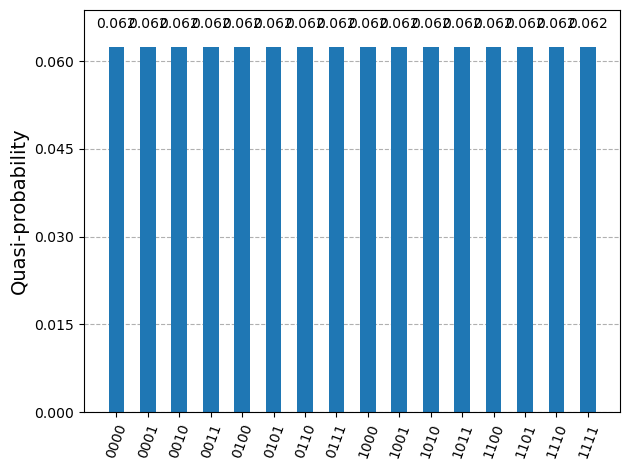

        ┌───┐ ░ ┌─┐         
   q_0: ┤ H ├─░─┤M├─────────
        ├───┤ ░ └╥┘┌─┐      
   q_1: ┤ H ├─░──╫─┤M├──────
        ├───┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├─░──╫──╫─┤M├───
        ├───┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├─░──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════╩══╩══╩══╩═
                 0  1  2  3 


In [1]:
%matplotlib inline
# genera un numero intero in un intervallo tra due numeri interi con un simulatore ideale
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import scipy
from qiskit.quantum_info import Statevector

# input
a = int(input('inserisci l\'estremo sx dell\'intervallo\' (intero) : \n'))
b = int(input('inserisci l\'estremo dx dell\'intervallo\'(intero) : \n'))
# otteniamo prima un numero casuale in [0,(b-a)] e poi trasliamo in [a,b]
num_bit = (b-a).bit_length()
print(num_bit)

# creazione del circuito
qc = QuantumCircuit(num_bit)
for i in range(num_bit) : # i = riga del circuito
    qc.h(i)

# statevector
state = Statevector.from_instruction(qc) 
print("Statevector:", state) # Print the statevector
probs = state.probabilities_dict() # Get the probabilities of each state
plot_histogram(probs)
plt.show()

qc.measure_all()
print(qc)

DescribeResult(nobs=np.int64(16), minmax=(np.int64(575), np.int64(656)), mean=np.float64(625.0), variance=np.float64(555.4666666666667), skewness=np.float64(-0.4833492645896867), kurtosis=np.float64(-0.6528867182359357))


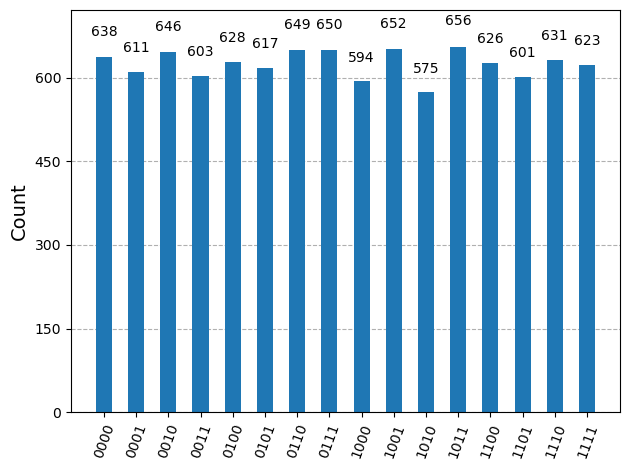

In [5]:
%matplotlib inline

simulator = AerSimulator(method='statevector') # NON facciamo traspilazione
N = 10000
# prova che il simulatore sia casuale 
result = simulator.run(qc, shots=N).result()  # Execute the circuit with 1024 shots
counts = result.get_counts()  # Get measurement counts
# analisi statistica di counts.values() : 
valori_int = [int(v) for v in counts.values()]   

# rivedi questo pezzo (anche per gli altri)
print(scipy.stats.describe(valori_int))
plot_histogram(counts)
plt.show()

varianza : 
 555.4666666666667
16
prova : 
 585.9375
dev_standard  :  23.56834034603766
radice di N : 
  100.0
n
 24.206145913796355


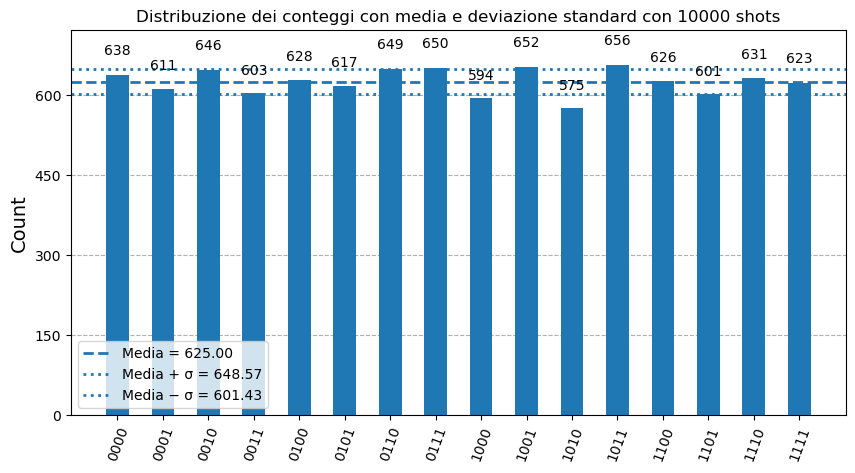

In [ ]:
# ANALISI STATISTICA 

media = sum(valori_int) / len(valori_int)
varianza = sum((x - media)**2 for x in valori_int) / (len(valori_int)-1)
print('varianza : \n',varianza)
print(2**num_bit)
n = N * (1/2**num_bit)*(1-1/2**num_bit)
print('prova : \n',n)
print('dev_standard  : ',varianza**(1/2))
print('radice di N : \n ',N**(1/2))
n = (N*2**(-num_bit)*(1-2**(-num_bit)))**(1/2)
print('n\n',n)
#frequenze = [v/N for v in valori_int]
#print(frequenze)
#plot_histogram(frequenze,title = f'frequenze con {N} shots')
#plt.show()

# grafico dei counts con media e dev standard
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import numpy as np

# estrai valori interi dalle occorrenze
valori_int = np.array([int(v) for v in counts.values()])

media = np.mean(valori_int)
dev_std = np.std(valori_int, ddof=1)

# crea la figura
fig, ax = plt.subplots(figsize=(10,5))

# istogramma originale di Qiskit (counts)
plot_histogram(counts, ax=ax)

# aggiungi linee orizzontali
ax.axhline(media, linestyle='--', linewidth=2, label=f"Media = {media:.2f}")
ax.axhline(media + dev_std, linestyle=':', linewidth=2, label=f"Media + σ = {media+dev_std:.2f}")
ax.axhline(media - dev_std, linestyle=':', linewidth=2, label=f"Media − σ = {media-dev_std:.2f}")

ax.set_title(f"Distribuzione dei conteggi con media e deviazione standard con {N} shots")
ax.legend()

plt.show()

# abbiamo visto che + dev_stand / media va come k/sqrt(num_shots)+c
# dev_st = rad (n)p*(1-p) (formula teorica)
# idea di gaussiana : x = conteggi , y = quante volte è presente lo stesso conteggio (o sta in un range)
    #  es : counts = {00 : 5, 01 : 6, 10 : 6, 11 : 12} 
            # asse x = {5,6,12}
            # asse y = {1,2,1} (o in un range quindi {3,1})

In [ ]:
# generiamo un solo numero nell'intervallo [a,b] per il generatore casuale
prop = 1
while( prop == 1 ) :
    result = simulator.run(qc, shots=1).result()
    numero_b2 = list(result.get_counts().keys())[0]  # lista di un unico elemento che è una stringa
    # conversione da base_2 in base_10
    numero_b10 = 0
    k = num_bit - 1
    for cifra in numero_b2:
        numero_b10 = numero_b10 + (int(cifra)) * 2 ** (k)
        k = k - 1
    prop = numero_b10 > (b - a)
    if (prop == 0) :
        # trasformazione in numero intero
        numero_b10 = a + numero_b10

print(f'numero casuale tra {a} e {b}: {numero_b10}')